In [2]:
import eurostat

from pygold.graphs import configurar_grafica

# Obtener lista de todos los datos disponibles y buscar alguno de interés
df_list = eurostat.get_toc_df()

configurar_grafica()

In [3]:
df_list['title_lowercase'] = df_list['title'].str.lower()

In [4]:
# estos son los que nos interesan
productos_interes = [x for x in [x.lower() for x in df_list['title'].unique().tolist()] if 'interest' in x]

In [5]:
df_list[df_list['title_lowercase'].isin(productos_interes)]

,title,code,type,last update of data,last table structure change,data start,data end,title_lowercase
1853,Interest rates - monthly data,EI_MFIR_M,dataset,2024-09-12T11:00:00+0200,2024-09-12T11:00:00+0200,1980-01,2024-08,interest rates - monthly data
1925,Loan and deposit one year interest rate,ENPE_IRT_LD,dataset,2024-01-31T23:00:00+0100,2024-01-31T23:00:00+0100,2005,2022,loan and deposit one year interest rate
1930,Money market interest rates,ENPE_IRT_ST,dataset,2024-01-31T23:00:00+0100,2024-01-31T23:00:00+0100,2005,2022,money market interest rates
3524,Money market interest rates - annual data,IRT_ST_A,dataset,2024-02-07T11:00:00+0100,2024-01-06T11:00:00+0100,1970,2023,money market interest rates - annual data
3526,Money market interest rates - monthly data,IRT_ST_M,dataset,2024-09-12T11:00:00+0200,2024-09-06T11:00:00+0200,1970-01,2024-08,money market interest rates - monthly data
3528,Money market interest rates - quarterly data,IRT_ST_Q,dataset,2024-08-06T11:00:00+0200,2024-07-05T11:00:00+0200,1970-Q1,2024-Q2,money market interest rates - quarterly data
6493,3-month-interest rate,TEIMF040,dataset,2024-09-12T11:00:00+0200,2024-09-12T11:00:00+0200,2023-09,2024-08,3-month-interest rate
6500,Day-to-day money market interest rates,TEIMF100,dataset,2024-09-12T11:00:00+0200,2024-09-12T11:00:00+0200,2023-09,2024-08,day-to-day money market interest rates
7416,Interests payable and similar charges by produ...,SBS_CRE_PINTPAY,dataset,2017-10-25T23:00:00+0200,2024-01-03T23:00:00+0100,1997,2001,interests payable and similar charges by produ...
7419,Interests receivable and similar income by pro...,SBS_CRE_PINTREX,dataset,2017-10-25T23:00:00+0200,2024-01-03T23:00:00+0100,1997,2001,interests receivable and similar income by pro...


In [6]:
import eurostat
import pandas as pd

# Código del dataset de tasas de interés que encontraste: "EI_MFIR_M"
dataset_code = "EI_MFIR_M"

# Descargar los datos desde Eurostat
interest_rate_data = eurostat.get_data_df(dataset_code)

# Mostrar las primeras filas del DataFrame descargado
print(interest_rate_data.head())

# Ver el resumen de las columnas disponibles
print(interest_rate_data.columns)


  freq s_adj p_adj      indic geo\TIME_PERIOD  1980-01  1980-02  1980-03  \
0    M   NSA   NAP  MF-3MI-RT              BG      NaN      NaN      NaN   
1    M   NSA   NAP  MF-3MI-RT              CZ      NaN      NaN      NaN   
2    M   NSA   NAP  MF-3MI-RT              DK     16.0     18.0     19.0   
3    M   NSA   NAP  MF-3MI-RT              EA      NaN      NaN      NaN   
4    M   NSA   NAP  MF-3MI-RT              HR      NaN      NaN      NaN   

   1980-04  1980-05  ...  2023-11  2023-12  2024-01  2024-02  2024-03  \
0      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN  ...   7.0600   6.9700   6.6300   6.2000   5.8400   
2     19.0     19.0  ...   3.9520   3.9068   3.8895   3.8779   3.8788   
3      NaN      NaN  ...   3.9716   3.9331   3.9253   3.9232   3.9224   
4      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   

   2024-04  2024-05  2024-06  2024-07  2024-08  
0      NaN      NaN      NaN      NaN      NaN  
1   5.

In [7]:
# Filtrar por un país específico si la columna 'geo' está presente (ejemplo: 'ES' para España)
spain_data = interest_rate_data[interest_rate_data['geo\TIME_PERIOD'] == 'ES']


In [8]:
spain_data.drop(columns=['freq', 's_adj', 'p_adj', 'indic', 'geo\TIME_PERIOD'], inplace=True)

/var/folders/qy/_4dy6hwn4lx87rpthff73ql80000gn/T/ipykernel_32050/1577449130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_data.drop(columns=['freq', 's_adj', 'p_adj', 'indic', 'geo\TIME_PERIOD'], inplace=True)


In [9]:
spain_data = spain_data.T

spain_data.columns = ['INTEREST_RATIO']

<Axes: title={'center': 'Interest rate in Spain'}>

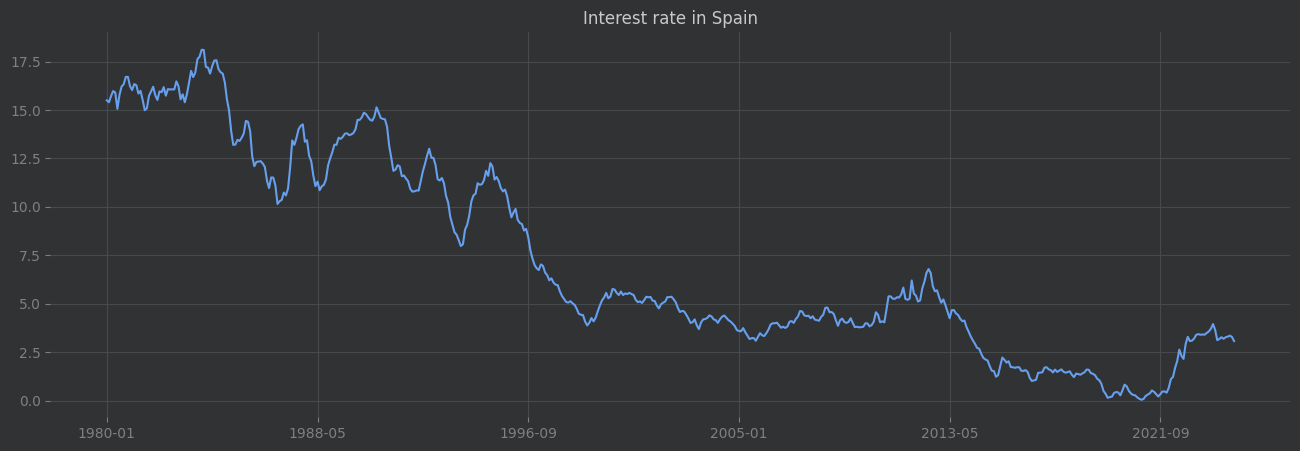

In [13]:
spain_data.plot(figsize=(16, 5), title='Interest rate in Spain', legend=False)

In [ ]:
spain_data.plot(backend='plotly')

In [ ]:


# Conversión de fechas a objetos datetime si el periodo está en formato temporal (por ejemplo "time")
if 'time' in interest_rate_data.columns:
    interest_rate_data['time'] = pd.to_datetime(interest_rate_data['time'])

    # Mostrar los primeros registros después de convertir las fechas
    print(interest_rate_data.head())


# Bonos del tesoro a 10 años

In [14]:
import yfinance as yf
import pandas as pd

# Descargar datos del bono del Tesoro a 10 años (GS10)
ticker = "^TNX"

# Descargar datos, aquí especificamos el periodo, en este caso los últimos 5 años
data = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# Mostramos los primeros registros del DataFrame
print(data.head())


[*********************100%***********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2019-01-02  2.652  2.679  2.649  2.661      2.661       0
2019-01-03  2.654  2.656  2.554  2.554      2.554       0
2019-01-04  2.599  2.673  2.597  2.659      2.659       0
2019-01-07  2.634  2.687  2.632  2.682      2.682       0
2019-01-08  2.701  2.717  2.696  2.716      2.716       0


In [15]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2.652,2.679,2.649,2.661,2.661,0
2019-01-03,2.654,2.656,2.554,2.554,2.554,0
2019-01-04,2.599,2.673,2.597,2.659,2.659,0
2019-01-07,2.634,2.687,2.632,2.682,2.682,0
2019-01-08,2.701,2.717,2.696,2.716,2.716,0
...,...,...,...,...,...,...
2023-12-22,3.852,3.919,3.849,3.901,3.901,0
2023-12-26,3.908,3.908,3.882,3.886,3.886,0
2023-12-27,3.852,3.852,3.785,3.789,3.789,0
